In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from antlia import lidar
from antlia.dtype import load_converted_record

%load_ext autoreload
%autoreload 2

In [2]:
filename = '../test.pkl.gz'
try:
    data = load_converted_record(filename)
except FileNotFoundError:
    import rosbag
    import printbag
    
    with rosbag.Bag(filename) as bag:
        data = printbag.convert_bag(bag)
finally:
    record = lidar.LidarRecord(data)

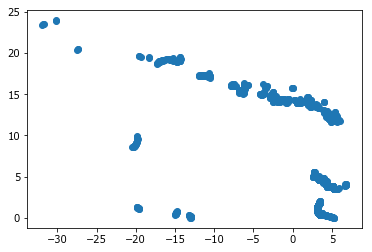

In [3]:
plt.close('all')

xy_lim = ((-60, 60), (0, 60))
x, y = map(lambda x: x.compressed(), record[0:1].cartesian(*xy_lim))

fig, ax = plt.subplots()
ax.scatter(x, y)

plt.show()

In [4]:
import IPython.display

def display_animation(animation):
    plt.close(animation._fig)
    IPython.display.display(IPython.display.HTML(animation.to_html5_video()))
    
display_animation(record[:100].animate(xlim=(-60, 60), ylim=(0, 60), figsize=(12, 8)))